In [10]:
import wandb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from helpers import classifier_helpers
import helpers.data_helpers as dh
import helpers.context_helpers as coh
import helpers.rewrite_helpers as rh
import helpers.vis_helpers as vh
from collections import defaultdict
import matplotlib.pyplot as plt
import random

import helpers.new_testing as nt
from helpers.new_testing import IMAGENET_CLASSES

In [11]:
api = wandb.Api()
run = api.run("lisadunlap/EditingClassifiers/1h5fz9pp")
run.summary

{'tank, army tank, armored combat vehicle, armoured combat vehicle acc dif': 1.851851851851862, 'avg acc change': 8.235371926548398, 'school bus acc dif': 8.82352941176471, 'snowplow, snowplough acc diff': -2, 'ski post acc': 76, 'training images': {'height': 224, '_type': 'images/separated', 'count': 10, 'width': 224, 'format': 'png'}, 'imagenet snow post': {'795': 76, '802': 94, '803': 90}, 'motor scooter, scooter acc dif': 18.75, 'fire engine, fire truck acc dif': 0, '_runtime': 88, '_timestamp': 1642714584, 'ski acc diff': -4, 'racer, race car, racing car acc dif': 20, 'car wheel acc dif': 6, 'snowmobile acc diff': 0, 'snowplow, snowplough pre acc': 92, 'snowplow, snowplough post acc': 90, '_step': 7, '_wandb': {'runtime': 89}, 'pre acc': {'847': 64.81481481481481, '920': 75.55555555555556, '479': 42, '555': 71.9298245614035, '670': 25, '751': 43.63636363636363, '779': 66.17647058823529}, 'snowmobile pre acc': 94, 'snowmobile post acc': 94, 'traffic light, traffic signal, stoplight

In [67]:
def addlabels(x,y, offset=0, bottom=False):
    for i in range(len(x)):
        if bottom:
            plt.text(i, offset, "{:.2f}".format(y[i]), ha = 'center')
        else:
            plt.text(i, y[i]+offset, "{:.2f}".format(y[i]), ha = 'center')

In [94]:
def get_df(pre, post):
    pre_df = pd.DataFrame(pre, index=[0]).T.reset_index()
    pre_df['mode'] = ['pre' for i in range(len(pre_df))]
    pre_df['class'] = [IMAGENET_CLASSES[int(k)][0] for k in pre_df['index']]
    pre_df.columns = ['index', 'acc', 'mode', 'class']
    post_df = pd.DataFrame(post, index=[0]).T.reset_index()
    post_df['mode'] = ['post' for i in range(len(post_df))]
    post_df['class'] = [IMAGENET_CLASSES[int(k)][0] for k in post_df['index']]
    post_df.columns = ['index', 'acc', 'mode', 'class']
    return pd.concat([pre_df, post_df])

def show_values_on_bars(axs, offset, rotation=90, bold=[], values=[], horiz=False, offset2=0):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            if horiz:
                _x = p.get_x() + offset
                _y = p.get_y() + p.get_height() / 2 + offset2
            else:
                _x = p.get_x() + p.get_width() / 2 + offset2
                _y = p.get_y() + offset
            if horiz:
                value = '{:.2f}'.format(p.get_width())
                bold_flag = value in bold
            else:
                value = '{:.2f}'.format(p.get_height())
                bold_flag = value in bold
            ax.text(_x, _y, value, ha="center", fontweight='bold' if bold_flag else 'normal', rotation=rotation) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

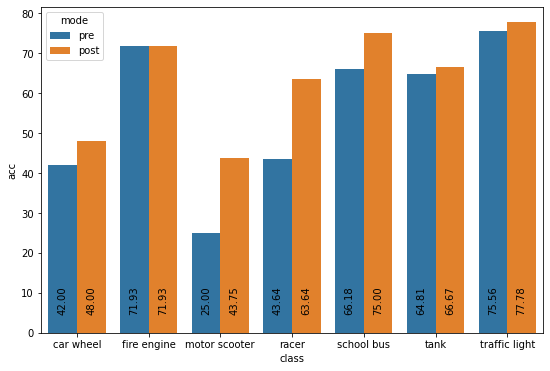

In [99]:
plt.figure(figsize=(9, 6))
pre = dict(sorted(run.summary['pre acc'].items()))
post = dict(sorted(run.summary['post acc'].items()))
results = get_df(pre, post)
ax = sns.barplot(x='class', y='acc', hue='mode', data=results)
show_values_on_bars(ax, 5)

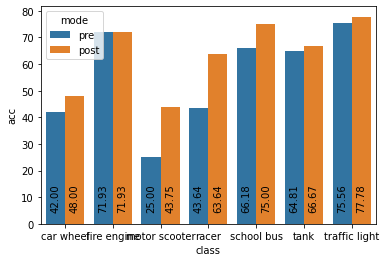

In [97]:
ax = sns.barplot(x='class', y='acc', hue='mode', data=results)
show_values_on_bars(ax, 5)